### Sanitation Survey Classification

The following is one of the assignments for the Data Mining class in the 6th semester. I was assigned to classify sanitation data in Surabaya using Logistics Regression, Decision Tree, Naive Bayes, K-Nearest Neighbor, and Support Vector Machine.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, auc, roc_curve

In [2]:
# Import Data
data = pd.read_csv('sanitation_survey.csv')
data.head()

,domestic_waste_disposal,household,education_of_head_of_household,occupation_of_head_of_household,household_income,household_expense,house_ownership_status,drain_time_(in_year),type_of_toilet,illness_of_a_family_member,water_for_bathing_washing,sanitary_behavior
0,1,1,3,6,0,0,1,0,0,0,1,1
1,1,0,2,4,0,0,0,0,1,0,1,1
2,1,1,1,3,0,0,0,0,1,0,1,1
3,1,1,1,2,1,1,0,0,1,0,1,1
4,1,1,3,3,0,0,0,0,1,0,1,0


Before carrying out the classification process, I did data exploration and data pre-processing (detection of missing values and outliers)

### Data Characteristics

In [3]:
data.shape

(102, 12)

In [4]:
data.describe()

,domestic_waste_disposal,household,education_of_head_of_household,occupation_of_head_of_household,household_income,household_expense,house_ownership_status,drain_time_(in_year),type_of_toilet,illness_of_a_family_member,water_for_bathing_washing,sanitary_behavior
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.686275,0.352941,2.343137,2.519608,0.598039,0.225490,0.686275,0.549020,0.901961,1.696078,0.764706,0.588235
std,0.466298,0.480245,1.189851,1.744754,0.492715,0.419968,0.832275,0.500049,0.298836,1.325972,0.426277,0.494583
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000
75%,1.000000,1.000000,3.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000
max,1.000000,1.000000,5.000000,6.000000,1.000000,1.000000,3.000000,1.000000,1.000000,3.000000,1.000000,1.000000


In [5]:
from statistics import mode
data.mode()

,domestic_waste_disposal,household,education_of_head_of_household,occupation_of_head_of_household,household_income,household_expense,house_ownership_status,drain_time_(in_year),type_of_toilet,illness_of_a_family_member,water_for_bathing_washing,sanitary_behavior
0,1,0,3,2,1,0,0,1,1,3,1,1


### Detecting Missing Values and Outlier

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   domestic_waste_disposal          102 non-null    int64
 1   household                        102 non-null    int64
 2   education_of_head_of_household   102 non-null    int64
 3   occupation_of_head_of_household  102 non-null    int64
 4   household_income                 102 non-null    int64
 5   household_expense                102 non-null    int64
 6   house_ownership_status           102 non-null    int64
 7   drain_time_(in_year)             102 non-null    int64
 8   type_of_toilet                   102 non-null    int64
 9   illness_of_a_family_member       102 non-null    int64
 10  water_for_bathing_washing        102 non-null    int64
 11  sanitary_behavior                102 non-null    int64
dtypes: int64(12)
memory usage: 9.7 KB


In [7]:
# Detecting Missing Value
data.isnull().sum()

domestic_waste_disposal            0
household                          0
education_of_head_of_household     0
occupation_of_head_of_household    0
household_income                   0
household_expense                  0
house_ownership_status             0
drain_time_(in_year)               0
type_of_toilet                     0
illness_of_a_family_member         0
water_for_bathing_washing          0
sanitary_behavior                  0
dtype: int64

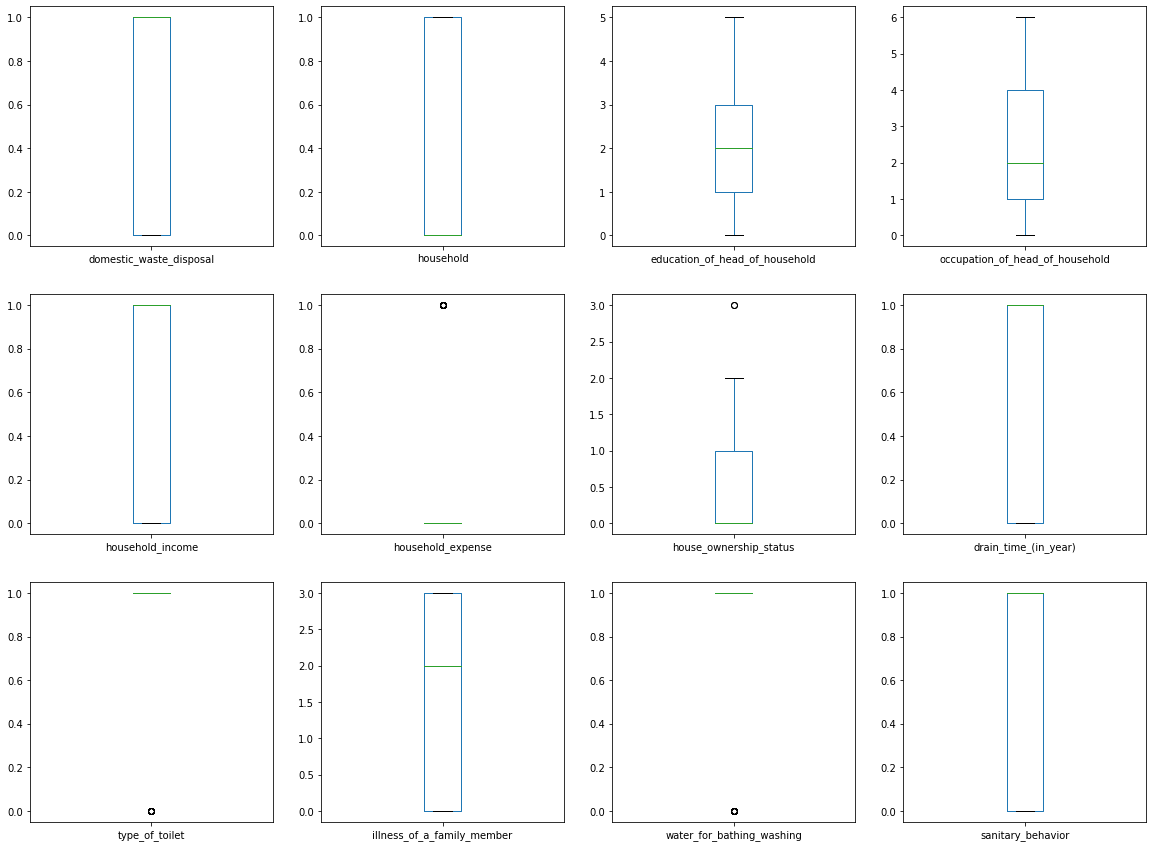

In [8]:
# Create a Boxplot
data.plot(kind = 'box', subplots = True, figsize = (20,15), layout = (3,4), sharex = False, sharey = False)
plt.show()

In [9]:
from scipy import stats
z = np.abs(stats.zscore(data._get_numeric_data()))
print(z)

[[0.6761234  1.3540064  0.55478101 ... 1.28543733 0.5547002  0.83666003]
 [0.6761234  0.73854895 0.28981097 ... 1.28543733 0.5547002  0.83666003]
 [0.6761234  1.3540064  1.13440296 ... 1.28543733 0.5547002  0.83666003]
 ...
 [0.6761234  0.73854895 0.55478101 ... 1.28543733 0.5547002  0.83666003]
 [0.6761234  0.73854895 0.28981097 ... 0.23033848 0.5547002  0.83666003]
 [0.6761234  0.73854895 0.55478101 ... 1.28543733 0.5547002  0.83666003]]


In [10]:
outlier = data[(z < 3).all(axis = 1)]
print(outlier.shape)

(92, 12)


In [11]:
import seaborn as sns
sns.set(style = "whitegrid")

In [12]:
c = pd.DataFrame([])
c["Notes"] = ["There is no outlier","Outlier"]
c["Observation"] = [92,102-92]
c

,Notes,Observation
0,There is no outlier,92
1,Outlier,10


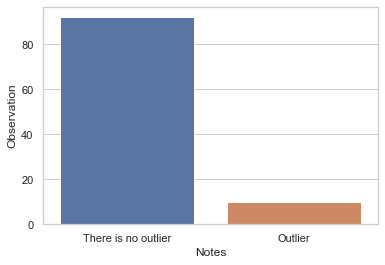

In [13]:
plot = sns.barplot(x = "Notes", y = "Observation", data = c)

### Splitting Data

In [14]:
# Splitting Data into Training and Testing
from sklearn.model_selection import train_test_split
y = data['domestic_waste_disposal']
x = data.drop(['domestic_waste_disposal'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 123)

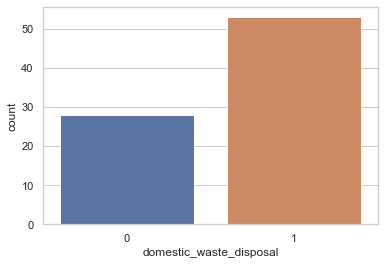

In [15]:
sns.countplot(x = y_train)
plt.show()

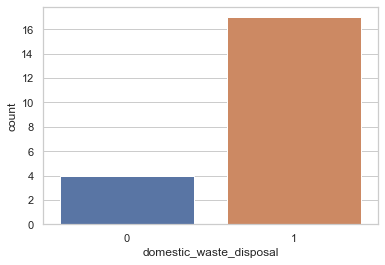

In [16]:
sns.countplot(x = y_test)
plt.show()

### Logistics Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logreg = LogisticRegression(random_state = 0)

In [19]:
model = logreg.fit(x_train,y_train)
logreg.score(x_train, y_train)

0.7530864197530864

In [20]:
logreg_predict = logreg.predict(x_test)

In [21]:
conf_matrix_logreg = confusion_matrix(y_test, logreg_predict)
Class = data['domestic_waste_disposal'].unique()
conf_matrix_logreg2 = pd.DataFrame(data = conf_matrix_logreg)
conf_matrix_logreg2

,0,1
0,1,3
1,3,14


In [22]:
accuracy_logreg = accuracy_score(y_test, logreg_predict)
precision_logreg = precision_score(y_test, logreg_predict)
recall_logreg = recall_score(y_test, logreg_predict)
fpr_logreg, tpr_logreg, thresholds = roc_curve(y_test, logreg_predict)
auc_logreg = auc(fpr_logreg,tpr_logreg)
print("Accuracy Logistic Regression  :", accuracy_logreg)
print("Precision Logistic Regression :", precision_logreg)
print("Recall Logistic Regression    :", recall_logreg)
print('AUC Logistic Regression       :', auc_logreg)

Accuracy Logistic Regression  : 0.7142857142857143
Precision Logistic Regression : 0.8235294117647058
Recall Logistic Regression    : 0.8235294117647058
AUC Logistic Regression       : 0.5367647058823529


### Discriminant

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [24]:
dis = LinearDiscriminantAnalysis()
dis.fit(x_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [25]:
dis.score(x_train,y_train)

0.7777777777777778

In [26]:
dis_predict = dis.predict(x_test)

In [27]:
conf_matrix_dis = confusion_matrix(y_test, dis_predict)
Class = data['domestic_waste_disposal'].unique()
conf_matrix_dis2 = pd.DataFrame(data = conf_matrix_dis)
conf_matrix_dis2

,0,1
0,1,3
1,5,12


In [28]:
accuracy_dis = accuracy_score(y_test, dis_predict)
precision_dis = precision_score(y_test, dis_predict)
recall_dis = recall_score(y_test, dis_predict)
fpr_dis, tpr_dis, thresholds = roc_curve(y_test, dis_predict)
auc_dis = auc(fpr_dis,tpr_dis)
print("Accuracy Discriminant  :", accuracy_dis)
print("Precision Discriminant :", precision_dis)
print("Recall Discriminant    :", recall_dis)
print('AUC Discriminant       :', auc_dis)

Accuracy Discriminant  : 0.6190476190476191
Precision Discriminant : 0.8
Recall Discriminant    : 0.7058823529411765
AUC Discriminant       : 0.47794117647058826


### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
rf.score(x_train,y_train)

1.0

In [31]:
rf_predict = rf.predict(x_test)

In [32]:
conf_matrix_rf = confusion_matrix(y_test, rf_predict)
Class = data['domestic_waste_disposal'].unique()
conf_matrix_rf2 = pd.DataFrame(data = conf_matrix_rf)
conf_matrix_rf2

,0,1
0,2,2
1,3,14


In [33]:
accuracy_rf = accuracy_score(y_test, rf_predict)
precision_rf = precision_score(y_test, rf_predict)
recall_rf = recall_score(y_test, rf_predict)
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, rf_predict)
auc_rf = auc(fpr_rf,tpr_rf)
print("Accuracy Random Forest  :", accuracy_rf)
print("Precision Random Forest :", precision_rf)
print("Recall Random Forest    :", recall_rf)
print('AUC Random Forest       :', auc_rf)

Accuracy Random Forest  : 0.7619047619047619
Precision Random Forest : 0.875
Recall Random Forest    : 0.8235294117647058
AUC Random Forest       : 0.6617647058823529


### Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [35]:
nb.score(x_train,y_train)

0.7283950617283951

In [36]:
ynb_predict = nb.predict(x_test)
ynb_proba = nb.predict_proba(x_test)

In [37]:
conf_matrix_nb = confusion_matrix(y_test, ynb_predict)
Class = data['domestic_waste_disposal'].unique()
conf_matrix_nb2 = pd.DataFrame(data = conf_matrix_nb)
conf_matrix_nb2

,0,1
0,2,2
1,5,12


In [38]:
accuracy_nb = accuracy_score(y_test, ynb_predict)
precision_nb = precision_score(y_test, ynb_predict)
recall_nb = recall_score(y_test, ynb_predict)
fpr_nb, tpr_nb, thresholds = roc_curve(y_test, ynb_predict)
auc_nb = auc(fpr_nb,tpr_nb)
print("Accuracy Naive Bayes  :", accuracy_nb)
print("Precision Naive Bayes :", precision_nb)
print("Recall Naive Bayes    :", recall_nb)
print('AUC Naive Bayes       :', auc_nb)

Accuracy Naive Bayes  : 0.6666666666666666
Precision Naive Bayes : 0.8571428571428571
Recall Naive Bayes    : 0.7058823529411765
AUC Naive Bayes       : 0.6029411764705883


### K-Nearest Neighbor

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [41]:
from sklearn.model_selection import KFold, cross_val_score

In [42]:
kfold = KFold(n_splits = 10)
accuracy_knn = cross_val_score(knn, x, y, cv = kfold, scoring = 'accuracy')
precision_knn = cross_val_score(knn, x, y, cv = kfold, scoring = 'precision')
recall_knn = cross_val_score(knn, x, y, cv = kfold, scoring = 'recall')
auc_knn = cross_val_score(knn, x, y, cv = kfold, scoring = 'roc_auc')
print("Average of Accuracy kNN  :", accuracy_knn.mean())
print("Average of Precision kNN :", precision_knn.mean())
print("Average of Recall kNN    :", recall_knn.mean())
print("Average of AUC kNN       :", auc_knn.mean())

Average of Accuracy kNN  : 0.6536363636363636
Average of Precision kNN : 0.6932539682539682
Average of Recall kNN    : 0.8032142857142857
Average of AUC kNN       : 0.6077103174603175


#### Find the Best k

In [43]:
k_range = range(5,10)
k_accuracy = []
k_precision = []
k_recall = []
for k in k_range :
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy_knn = cross_val_score(knn, x, y, cv = kfold, scoring = 'accuracy')
    k_accuracy.append(accuracy_knn.mean())
    precision_knn = cross_val_score(knn, x, y, cv = kfold, scoring = 'precision')
    k_precision.append(precision_knn.mean())
    recall_knn = cross_val_score(knn, x, y, cv = kfold, scoring = 'recall')
    k_recall.append(recall_knn.mean())

In [44]:
print(k_accuracy)
print(k_precision)
print(k_recall)

[0.6536363636363636, 0.6445454545454545, 0.6754545454545455, 0.6936363636363636, 0.7036363636363637]
[0.6932539682539682, 0.6954761904761906, 0.6907467532467533, 0.7089285714285716, 0.7063492063492065]
[0.8032142857142857, 0.7809920634920635, 0.8482142857142858, 0.8482142857142858, 0.9275]


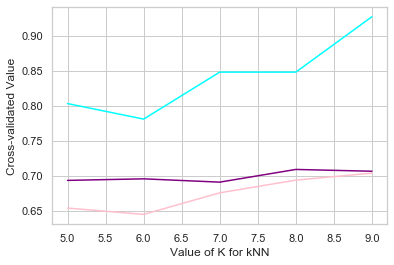

In [45]:
%matplotlib inline
plt.plot(k_range, k_accuracy, color = 'pink')
plt.plot(k_range, k_precision, color = 'purple')
plt.plot(k_range, k_recall, color = 'cyan')
plt.xlabel('Value of K for kNN')
plt.ylabel('Cross-validated Value')
plt.show()

#### K-Nearest Neighbor with k = 9

In [46]:
knn9 = KNeighborsClassifier(n_neighbors = 9)

In [47]:
knn9.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [48]:
knn9.score(x_train,y_train)

0.7777777777777778

In [49]:
yknn_predict = knn9.predict(x_test)

In [50]:
conf_matrix_knn9 = confusion_matrix(y_test, yknn_predict)
Class = data['domestic_waste_disposal'].unique()
conf_matrix_knn92 = pd.DataFrame(data = conf_matrix_knn9)
conf_matrix_knn92

,0,1
0,1,3
1,3,14


In [51]:
kfold = KFold(n_splits=3)
accuracy_knn = cross_val_score(knn9, x, y, cv = kfold, scoring = 'accuracy')
precision_knn = cross_val_score(knn9, x, y, cv = kfold, scoring = 'precision')
recall_knn = cross_val_score(knn9, x, y, cv = kfold, scoring = 'recall')
auc_knn = cross_val_score(knn9, x, y, cv = kfold, scoring = 'roc_auc')
print("Average of Accuracy kNN  :", accuracy_knn.mean())
print("Average of Precision kNN :", precision_knn.mean())
print("Average of Recall kNN    :", recall_knn.mean())
print("Average of AUC kNN       :", auc_knn.mean())

Average of Accuracy kNN  : 0.6274509803921569
Average of Precision kNN : 0.686174639635141
Average of Recall kNN    : 0.8246753246753246
Average of AUC kNN       : 0.6023448773448774


### Support Vector Machine

In [52]:
from sklearn import svm

In [53]:
random_state = np.random.RandomState(0)
svclin = svm.SVC(kernel = 'linear', probability = True, random_state = random_state)

In [54]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
k_fold = StratifiedKFold(n_splits=3)
accuracy_svm = cross_val_score(svclin, x, y, cv = k_fold, scoring = 'accuracy')
precision_svm = cross_val_score(svclin, x, y, cv = k_fold, scoring = 'precision')
recall_svm = cross_val_score(svclin, x, y, cv = k_fold, scoring = 'recall')
accuracy_svm = np.array(accuracy_svm)
precision_svm = np.array(precision_svm)
recall_svm = np.array(recall_svm)
print("Accuracy SVM  :", accuracy_svm.mean())
print("Precision SVM :", precision_svm.mean())
print("Recall SVM    :", recall_svm.mean())

Accuracy SVM  : 0.6372549019607843
Precision SVM : 0.7144227886056971
Recall SVM    : 0.7844202898550724


In [55]:
from scipy import interp
from itertools import cycle
from sklearn.metrics import roc_curve,auc

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


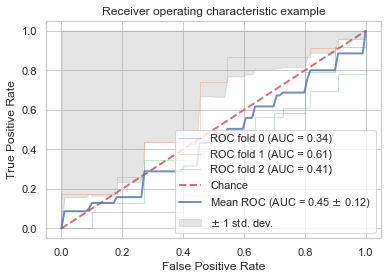

In [56]:
random_state = np.random.RandomState(0)
n_samples, n_features = x.shape
x = np.c_[x, random_state.randn(n_samples, 200*n_features)]

cv = StratifiedKFold(n_splits = 3)
classifier = svm.SVC(kernel = 'linear', probability = True, random_state = random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=0
for train,test in cv.split(x,y):
    probas_ = classifier.fit(x[train],y[train]).predict_proba(x[test])
    # Compute ROC Curve and the Curve Area
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:,1])
    tprs.append(interp(mean_fpr,fpr,tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr,tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw = 1, alpha = 0.3, label = 'ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

plt.plot([0,1],[0,1],linestyle = '--', lw = 2, color = 'r', label = 'Chance', alpha = .8)

mean_tpr = np.mean(tprs, axis = 0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr,mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color = 'b', label = r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc,std_auc), lw = 2, alpha = .8)

std_tpr = np.std(tprs,axis = 0)
tprs_upper = np.minimum(mean_tpr+std_tpr,1)
tprs_lower = np.maximum(mean_tpr-std_tpr,1)
plt.fill_between(mean_fpr,tprs_lower,tprs_upper, color = 'grey', alpha = .2, label = r'$\pm$ 1 std. dev.')

plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

In [57]:
print("AUC SVM       :", mean_auc)

AUC SVM       : 0.4533255257892938


In [58]:
classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True,
    random_state=RandomState(MT19937) at 0x1F1601D89D8, shrinking=True,
    tol=0.001, verbose=False)

In [59]:
classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True,
    random_state=RandomState(MT19937) at 0x1F1601D89D8, shrinking=True,
    tol=0.001, verbose=False)

In [60]:
classifier.score(x_train,y_train)

0.7654320987654321

In [61]:
ysvm_predict = classifier.predict(x_test)

In [62]:
conf_matrix_svm = confusion_matrix(y_test, ysvm_predict)
Class = data['domestic_waste_disposal'].unique()
conf_matrix_svm2 = pd.DataFrame(data = conf_matrix_svm)
conf_matrix_svm2

,0,1
0,2,2
1,2,15


Based on the analysis, it is known that the method that gives the highest value of accuracy, precision, and AUC is the Random Forest method while the method that gives the greatest recall value is K-Nearest Neighbor.